In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving features.csv to features.csv


In [ ]:
import pandas as pd
import io
df_fts = pd.read_csv(io.BytesIO(uploaded['features.csv']))
df_fts

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving stores.csv to stores.csv


In [ ]:
import pandas as pd
import io
df_str = pd.read_csv(io.BytesIO(uploaded['stores.csv']))
df_str.head(10)

KeyError: ignored

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import io
df_trn = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_trn

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train=df_trn.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [ ]:
data=pd.merge(train,df_fts,on=['Store','Date'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [ ]:
data=pd.merge(data,df_str,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


Date on which maximum sale took place?

In [ ]:
max_sales=data['Weekly_Sales'].max()
date_max_sales=data['Date'][data['Weekly_Sales']==max_sales]
print(date_max_sales.values)

['2010-12-24']


 How many times the store 1 has weekly_sales greater than 1641957.44?

In [ ]:
week_sales_times=data[(data['Weekly_Sales']>1641957.44) & (data['Store']==1) ]
len(week_sales_times)

24

What is the maximum weekly sale of each store?

In [ ]:
max_sale_str=data.groupby(['Store'])['Weekly_Sales'].max()
max_sale_str

Store
1     2387950.20
2     3436007.68
3      605990.41
4     3676388.98
5      507900.07
6     2727575.18
7     1059715.27
8     1511641.09
9      905324.68
10    3749057.69
11    2306265.36
12    1768249.89
13    3595903.20
14    3818686.45
15    1368318.17
16    1004730.69
17    1309226.79
18    2027507.15
19    2678206.42
20    3766687.43
21    1587257.78
22    1962445.04
23    2734277.10
24    2386015.75
25    1295391.19
26    1573982.47
27    3078162.08
28    2026026.39
29    1130926.79
30     519354.88
31    2068942.97
32    1959526.96
33     331173.51
34    1620748.25
35    1781866.98
36     489372.02
37     605791.46
38     499267.66
39    2554482.84
40    1648829.18
41    2263722.68
42     674919.45
43     725043.04
44     376233.89
45    1682862.03
Name: Weekly_Sales, dtype: float64

Find the maximum cpi of each store.

In [ ]:
max_CPI_str=data.groupby(['Store'])['CPI'].max()
max_CPI_str

Store
1     223.444251
2     223.078337
3     226.987364
4     131.193097
5     224.037814
6     225.068625
7     199.219532
8     227.036936
9     227.232807
10    131.193097
11    226.987364
12    131.193097
13    131.193097
14    192.330854
15    138.911700
16    199.219532
17    131.193097
18    138.911700
19    138.911700
20    216.151590
21    223.078337
22    142.937617
23    138.911700
24    138.911700
25    216.151590
26    138.911700
27    142.937617
28    131.193097
29    138.911700
30    223.078337
31    223.078337
32    199.219532
33    131.193097
34    131.193097
35    142.937617
36    222.113657
37    222.113657
38    131.193097
39    222.113657
40    138.911700
41    199.219532
42    131.193097
43    214.741539
44    131.193097
45    192.330854
Name: CPI, dtype: float64

Calculate average size of each store

In [ ]:
max_sz_str=data.groupby(['Store'])['Size'].mean()
max_sz_str

Store
1     151315.0
2     202307.0
3      37392.0
4     205863.0
5      34875.0
6     202505.0
7      70713.0
8     155078.0
9     125833.0
10    126512.0
11    207499.0
12    112238.0
13    219622.0
14    200898.0
15    123737.0
16     57197.0
17     93188.0
18    120653.0
19    203819.0
20    203742.0
21    140167.0
22    119557.0
23    114533.0
24    203819.0
25    128107.0
26    152513.0
27    204184.0
28    206302.0
29     93638.0
30     42988.0
31    203750.0
32    203007.0
33     39690.0
34    158114.0
35    103681.0
36     39910.0
37     39910.0
38     39690.0
39    184109.0
40    155083.0
41    196321.0
42     39690.0
43     41062.0
44     39910.0
45    118221.0
Name: Size, dtype: float64

In [ ]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,210.622857,7.808,False,A,151315


In [ ]:
data=data.replace(to_replace='A',value='1')
data=data.replace(to_replace='B',value='2')
data=data.replace(to_replace='C',value='3')
data

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,1,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,1,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,1,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,1,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,1,151315
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,False,2,118221
6431,45,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,False,2,118221
6432,45,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,False,2,118221
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,False,2,118221


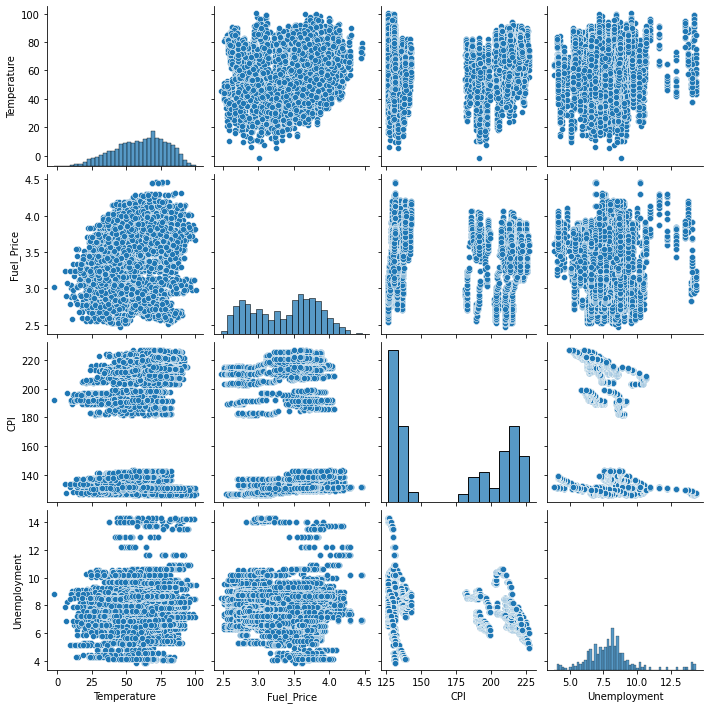

In [ ]:
dataset=data.drop(['Weekly_Sales','Store','Date','IsHoliday','Type','Size'],axis=1)
sns.pairplot(dataset)

Linear regression on weekly sales interpretation

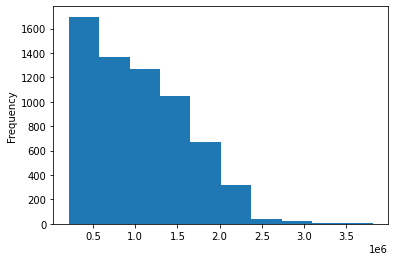

In [ ]:
data["Weekly_Sales"].plot.hist()

In [ ]:
x=data.drop(['Weekly_Sales','Store','Date','IsHoliday','Holiday'],axis=1)
x

,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,42.31,2.572,211.096358,8.106,1,151315
1,38.51,2.548,211.242170,8.106,1,151315
2,39.93,2.514,211.289143,8.106,1,151315
3,46.63,2.561,211.319643,8.106,1,151315
4,46.50,2.625,211.350143,8.106,1,151315
...,...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,2,118221
6431,64.89,3.985,192.170412,8.667,2,118221
6432,54.47,4.000,192.327265,8.667,2,118221
6433,56.47,3.969,192.330854,8.667,2,118221


In [ ]:
y=data['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression(normalize=True)

In [ ]:
lm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
print(lm.coef_)

[ 1.35311226e+03 -2.38361068e+04 -1.38745591e+03 -2.37436770e+04
  8.02329225e+04  7.92336484e+00]


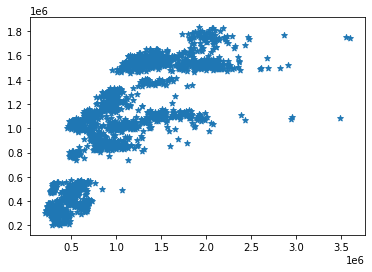

In [ ]:
pred_lm=lm.predict(x_test)
plt.scatter(y_test,pred_lm,marker='*')

In [ ]:
from sklearn import metrics
print("MAE:{}".format(metrics.mean_absolute_error(y_test,pred_lm)))
print("MSE:{}".format(metrics.mean_squared_error(y_test,pred_lm)))
print("RMSE:{}".format(np.sqrt(metrics.mean_squared_error(y_test,pred_lm))))

MAE:242498.05419633022
MSE:103723418303.98543
RMSE:322061.2027301417


Root Mean Squared Error of Linear Regression:322061.2027

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred_lm)
print(r2)

0.6704888365904292


Support Vector Machines for interpretation of type A,B,C

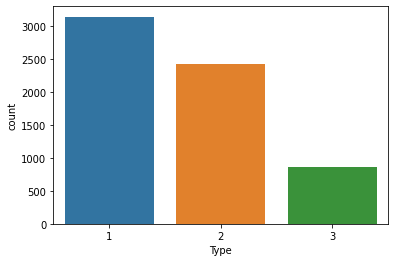

In [ ]:
sns.countplot(x="Type", data=data)

In [ ]:
x1=data.drop(['Weekly_Sales','Store','Date','IsHoliday','Type','Holiday'],axis=1)
y1=data['Type']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.30)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,Y_train)

SVC()

In [ ]:
pred_svm=model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(Y_test,pred_svm))
print("\n")
print(classification_report(Y_test,pred_svm))

[[902   0  83]
 [  0 636  80]
 [  0   0 230]]


              precision    recall  f1-score   support

           1       1.00      0.92      0.96       985
           2       1.00      0.89      0.94       716
           3       0.59      1.00      0.74       230

    accuracy                           0.92      1931
   macro avg       0.86      0.93      0.88      1931
weighted avg       0.95      0.92      0.92      1931



Average Accuracy of SVM Prediction=95%